In [3]:
import pandas as pd
import seaborn as sns

speeds = pd.read_csv('segment_speeds.csv')
speeds2 = pd.read_csv('segment_speeds_thru_april.csv')

speeds.shape

(2691, 10)

In [4]:
speeds['obj_class'] = speeds['obj_class'].fillna("no object")
speeds.head()
speeds2['obj_class'] = speeds2['obj_class'].fillna("no object")
speeds.head()
# data = [['fedex_truck',  265], ['ups_truck', 165], ['amazon_truck', 91]]
# df = pd.DataFrame(data, columns = ['vehicle_type', 'number of vehicle occurances'])

# ax = df.set_index('vehicle_type').plot.bar()
# ax.set(xlabel="Vehicle Type", ylabel="Number of Vehicle Occurances") 
# ax.set_title("Number of Vehicle Occurances on Bus Lane")
# df.head()


,Unnamed: 0,segment,speed,detection,obj_class,detection_ts,start_ts,end_ts,start_filename,end_filename
0,0,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:12,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
1,1,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:13,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
2,2,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:14,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
3,3,College Ave,14.4,True,amazon_truck,2021-10-04 14:17:23,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4
4,4,College Ave,14.4,True,fedex_truck,2021-10-04 14:17:25,2021-10-04 14:16:58,2021-10-04 14:17:33,GRMN_Bancroft_1.MP4,GRMN_Bancroft_1.MP4


In [41]:
grouped = speeds2.groupby(['segment', 'start_ts', "end_ts"]).first().reset_index()
grouped.head()


,segment,start_ts,end_ts,Unnamed: 0,speed,detection,obj_class,detection_ts,start_filename,end_filename
0,Bus Stop,2021-10-04 15:22:36,2021-10-04 15:23:02,6,20.769231,True,bus,10/4/2021 15:23,Bancroft_Vids_3681.mp4,Bancroft_Vids_3682.mp4
1,Bus Stop,2021-10-04 15:51:38,2021-10-04 15:52:21,10,12.558140,False,no object,None,Bancroft_Vids_3686.mp4,Bancroft_Vids_3687.mp4
2,Bus Stop,2021-10-04 18:19:15,2021-10-04 18:19:44,20,18.620690,False,no object,None,Bancroft_Vids_3717.mp4,Bancroft_Vids_3717.mp4
3,Bus Stop,2021-10-04 19:48:15,2021-10-04 19:48:43,28,19.285714,False,no object,None,Bancroft_Vids_3740.mp4,Bancroft_Vids_3741.mp4
4,Bus Stop,2021-10-04 20:47:01,2021-10-04 20:47:37,41,15.000000,False,no object,None,Bancroft_Vids_3757.mp4,Bancroft_Vids_3758.mp4


In [42]:
grouped[grouped['detection'] == True]['speed'].mean()

12.724258510180736

In [43]:
grouped[grouped['detection'] == False]['speed'].mean()

13.685346171617379

In [44]:
#College AVE with det
grouped[(grouped['detection'] == True)  & (grouped['segment']=='College Ave')]['speed'].mean()

10.694612316798759

In [45]:
#College AVE without det
grouped[(grouped['detection'] == False)  & (grouped['segment']=='College Ave')]['speed'].mean()

12.031783184062968

In [46]:
#Shattuck with det
grouped[(grouped['detection'] == True)  & (grouped['segment']=='Shattuck')]['speed'].mean()

14.692829749512907

In [47]:
#Shattuck without det
grouped[(grouped['detection'] == False)  & (grouped['segment']=='Shattuck')]['speed'].mean()

14.751689986536515

In [48]:
#Bus stop with det
grouped[(grouped['detection'] == True)  & (grouped['segment']=='Bus Stop')]['speed'].mean()

14.453016225754453

In [49]:
#Bus stop without det
grouped[(grouped['detection'] == False)  & (grouped['segment']=='Bus Stop')]['speed'].mean()

17.542287149135525

In [50]:
grouped[(grouped['detection'] == True)]['segment'].value_counts()

College Ave    421
Shattuck       348
Bus Stop        98
Name: segment, dtype: int64

In [51]:
from datetime import datetime
date = pd.to_datetime(grouped['detection_ts']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
date2 = pd.to_datetime(grouped['start_ts']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
#df['year'] = date.dt.year
#df['month'] = date.dt.month
#df['day'] = date.dt.day
#df['weekday'] = date.dt.weekday + 1
grouped['hour'] = date.dt.hour
grouped['segment_hour'] = date2.dt.hour

#df['date'] = date.dt.date

In [52]:
grouped.head()

,segment,start_ts,end_ts,Unnamed: 0,speed,detection,obj_class,detection_ts,start_filename,end_filename,hour,segment_hour
0,Bus Stop,2021-10-04 15:22:36,2021-10-04 15:23:02,6,20.769231,True,bus,10/4/2021 15:23,Bancroft_Vids_3681.mp4,Bancroft_Vids_3682.mp4,8.0,8
1,Bus Stop,2021-10-04 15:51:38,2021-10-04 15:52:21,10,12.558140,False,no object,None,Bancroft_Vids_3686.mp4,Bancroft_Vids_3687.mp4,NaN,8
2,Bus Stop,2021-10-04 18:19:15,2021-10-04 18:19:44,20,18.620690,False,no object,None,Bancroft_Vids_3717.mp4,Bancroft_Vids_3717.mp4,NaN,11
3,Bus Stop,2021-10-04 19:48:15,2021-10-04 19:48:43,28,19.285714,False,no object,None,Bancroft_Vids_3740.mp4,Bancroft_Vids_3741.mp4,NaN,12
4,Bus Stop,2021-10-04 20:47:01,2021-10-04 20:47:37,41,15.000000,False,no object,None,Bancroft_Vids_3757.mp4,Bancroft_Vids_3758.mp4,NaN,13


/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

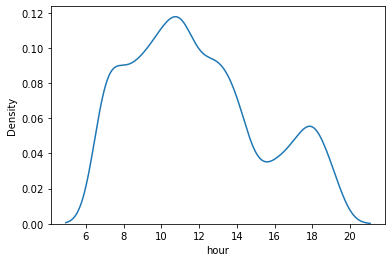

In [53]:
college_ave = grouped[(grouped['segment']=='College Ave') & (grouped['detection']==True)]
sns.kdeplot(data = college_ave['hour'], bw=0.2, label='college_ave')

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

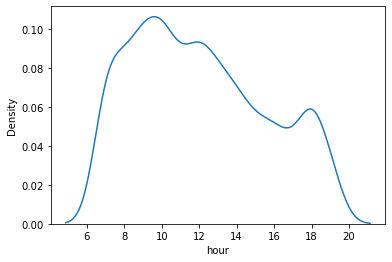

In [54]:
stattuck = grouped[(grouped['segment']=='Shattuck') & (grouped['detection']==True)]
sns.kdeplot(data = stattuck['hour'], bw=0.2, label='stattuck')

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

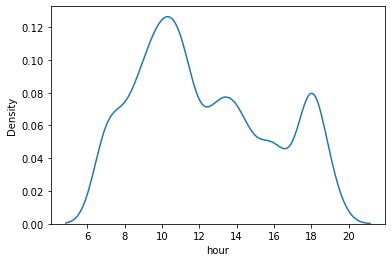

In [55]:
bus_stop = grouped[(grouped['segment']=='Bus Stop') & (grouped['detection']==True)]
sns.kdeplot(data = bus_stop['hour'], bw=0.2, label='bus_stop')

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed', ylabel='Density'>

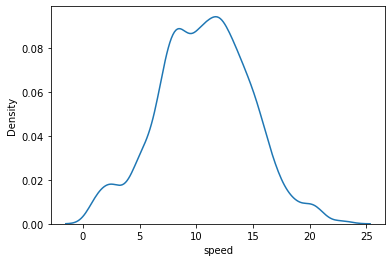

In [56]:
#College AVE WITH detection
sns.kdeplot(data = college_ave['speed'], bw=0.2, label='college_ave')

/Users/priya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed', ylabel='Density'>

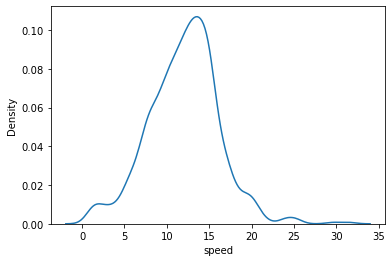

In [57]:
#College AVE without detection
college_ave = grouped[(grouped['segment']=='College Ave') & (grouped['detection']==False)]
sns.kdeplot(data = college_ave['speed'], bw=0.2, label='college_ave_no_detection')


In [58]:
ordered = grouped.sort_values(by=['speed'])
ordered = ordered[ordered['speed'] > 5]
ordered = ordered[ordered['hour'] > 17]
ordered.head(20)

,segment,start_ts,end_ts,Unnamed: 0,speed,detection,obj_class,detection_ts,start_filename,end_filename,hour,segment_hour
814,College Ave,2021-12-09 03:19:29,2021-12-09 03:20:56,1287,5.793103,True,bus,12/9/2021 3:20,Bancroft_Vids_7111.mp4,Bancroft_Vids_7112.mp4,19.0,19
375,College Ave,2021-10-05 01:54:25,2021-10-05 01:55:49,61,6.000000,True,bus,10/5/2021 1:55,Bancroft_Vids_3821.mp4,Bancroft_Vids_3823.mp4,18.0,18
6,Bus Stop,2021-10-05 01:24:38,2021-10-05 01:26:04,59,6.279070,True,bus,10/5/2021 1:25,Bancroft_Vids_3816.mp4,Bancroft_Vids_3817.mp4,18.0,18
929,College Ave,2021-12-16 02:54:28,2021-12-16 02:55:48,1549,6.300000,True,bus,12/16/2021 2:55,Bancroft_Vids_7976.mp4,Bancroft_Vids_7977.mp4,18.0,18
1313,College Ave,2022-02-18 02:23:46,2022-02-18 02:25:01,2552,6.720000,True,bus,2/18/2022 2:24,Bancroft_Vids_2597.mp4,Bancroft_Vids_2598.mp4,18.0,18
1438,College Ave,2022-03-08 02:21:58,2022-03-08 02:23:11,2847,6.904110,True,bus,3/8/2022 2:23,Bancroft_Vids_3588.mp4,Bancroft_Vids_3589.mp4,18.0,18
567,College Ave,2021-11-16 03:18:24,2021-11-16 03:19:31,602,7.522388,True,bus,11/16/2021 3:19,Bancroft_Vids_4807.mp4,Bancroft_Vids_4808.mp4,19.0,19
1045,College Ave,2022-01-25 02:21:53,2022-01-25 02:22:59,1816,7.636364,True,bus,1/25/2022 2:22,Bancroft_Vids_556.mp4,Bancroft_Vids_557.mp4,18.0,18
881,College Ave,2021-12-14 03:18:27,2021-12-14 03:19:31,1447,7.875000,True,bus,12/14/2021 3:19,Bancroft_Vids_7723.mp4,Bancroft_Vids_7724.mp4,19.0,19
521,College Ave,2021-11-11 02:27:32,2021-11-11 02:28:35,469,8.000000,True,bus,11/11/2021 2:28,Bancroft_Vids_4456.mp4,Bancroft_Vids_4457.mp4,18.0,18


amazon_truck	2021-12-02 15:09:19	2021-12-02 15:23:45	1794	College Ave	0.581986	True	2021-12-02 15:21:31	GRMN_Bancroft_2744.MP4	GRMN_Bancroft_2759.MP4	7.0

GRMN_Bancroft_3077.MP4
GRMN_Bancroft_3190.MP4	

Slow downs primarily due pedestrians crossing the street, bicycles in front of the bus


In [59]:
hourly = grouped.groupby("segment_hour").mean().reset_index()

<AxesSubplot:xlabel='segment_hour'>

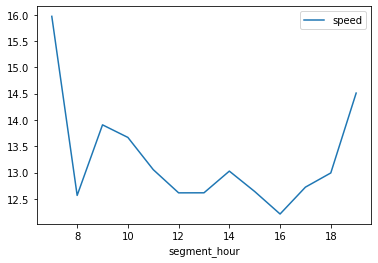

In [60]:
hourly.plot(x="segment_hour", y="speed")


In [61]:
#College AVE with det
grouped[(grouped['detection'] == True)  & (grouped['segment']=='College Ave') & (grouped['hour'] > 1)]['speed'].mean()

10.694612316798759

In [62]:
#College AVE with det
test = grouped[(grouped['hour'] > 15)]
test.head(50)
#grouped[(grouped['detection'] == False)  & (grouped['segment']=='College Ave') & (grouped['hour']>-1)]['speed'].mean()

,segment,start_ts,end_ts,Unnamed: 0,speed,detection,obj_class,detection_ts,start_filename,end_filename,hour,segment_hour
6,Bus Stop,2021-10-05 01:24:38,2021-10-05 01:26:04,59,6.279070,True,bus,10/5/2021 1:25,Bancroft_Vids_3816.mp4,Bancroft_Vids_3817.mp4,18.0,18
22,Bus Stop,2021-10-28 01:54:57,2021-10-28 01:55:26,168,18.620690,True,bus,10/28/2021 1:55,Bancroft_Vids_6085.mp4,Bancroft_Vids_6085.mp4,18.0,18
43,Bus Stop,2021-11-09 02:25:37,2021-11-09 02:26:05,368,19.285714,True,bus,11/9/2021 2:26,Bancroft_Vids_4170.mp4,Bancroft_Vids_4170.mp4,18.0,18
63,Bus Stop,2021-11-16 03:19:43,2021-11-16 03:20:22,603,13.846154,True,bus,11/16/2021 3:20,Bancroft_Vids_4808.mp4,Bancroft_Vids_4809.mp4,19.0,19
69,Bus Stop,2021-11-17 02:25:31,2021-11-17 02:26:03,671,16.875000,True,bus,11/17/2021 2:26,Bancroft_Vids_4964.mp4,Bancroft_Vids_4964.mp4,18.0,18
77,Bus Stop,2021-11-18 02:25:20,2021-11-18 02:26:06,733,11.739130,True,bus,11/18/2021 2:26,Bancroft_Vids_5035.mp4,Bancroft_Vids_5035.mp4,18.0,18
78,Bus Stop,2021-11-18 02:54:31,2021-11-18 02:55:08,745,14.594595,True,bus,11/18/2021 2:55,Bancroft_Vids_5042.mp4,Bancroft_Vids_5042.mp4,18.0,18
111,Bus Stop,2021-12-03 00:18:59,2021-12-03 00:19:32,1064,16.363636,True,bus,12/3/2021 0:19,Bancroft_Vids_6547.mp4,Bancroft_Vids_6548.mp4,16.0,16
112,Bus Stop,2021-12-03 01:26:42,2021-12-03 01:27:38,1068,9.642857,True,bus,12/3/2021 1:27,Bancroft_Vids_6562.mp4,Bancroft_Vids_6563.mp4,17.0,17
113,Bus Stop,2021-12-03 02:23:46,2021-12-03 02:24:12,1076,20.769231,True,bus,12/3/2021 2:24,Bancroft_Vids_6576.mp4,Bancroft_Vids_6576.mp4,18.0,18


In [63]:
grouped[(grouped['detection'] == False)]['speed'].mean()

13.685346171617379

In [64]:
grouped[(grouped['detection'] == True)]['speed'].mean()

12.724258510180736

Unnamed: 0      speed       hour  segment_hour
segment     detection                                                 
Bus Stop    False      1498.590551  17.542287        NaN     12.555118
            True       1278.617647  15.566048  10.676471     10.676471
College Ave False      1541.404444  12.031783        NaN     12.742222
            True       1253.000000  10.905721  10.480000     10.480000
Shattuck    False      1563.390625  14.751690        NaN     12.304688
            True       1501.726415  14.649146  10.528302     10.528302

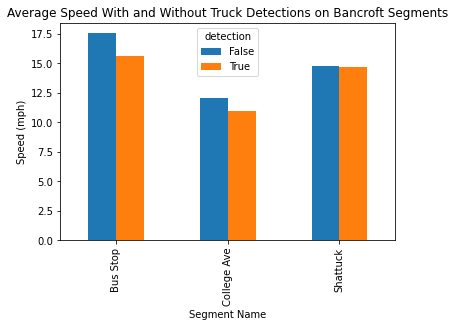

In [69]:
## we are looking to see if trucks are causing speed slowdowns so removing all bus detections
no_bus = grouped[(grouped['obj_class'] != 'bus')]
ax = no_bus.groupby(['segment', 'detection'])['speed'].mean().unstack().plot.bar()
ax.set(xlabel="Segment Name", ylabel="Speed (mph)") 
ax.set_title("Average Speed With and Without Truck Detections on Bancroft Segments")

no_bus.groupby(['segment', 'detection']).mean()

In [67]:
no_bus[(no_bus['detection'] == False)]['speed'].mean()

13.685346171617379

In [68]:
no_bus[(no_bus['detection'] == True)]['speed'].mean()

12.426965315352682

In [33]:
no_bus[(no_bus['segment']=='Bus Stop')]['obj_class'].value_counts()

no object       254
fedex_truck      22
amazon_truck     17
ups_truck        12
Name: obj_class, dtype: int64

In [26]:
grouped[(grouped['detection'] == True)  & (grouped['segment']=='College Ave') & (grouped['segment_hour']>16) ]['speed'].mean()

8.972642837039123

In [27]:
grouped[(grouped['detection'] == False)  & (grouped['segment']=='College Ave') & (grouped['segment_hour']>16) ]['speed'].mean()

10.4010657078762

In [28]:
grouped[(grouped['detection'] == True)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']>16) ]['speed'].mean()

12.995648141542413

In [29]:
grouped[(grouped['detection'] == False)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']>16) ]['speed'].mean()

14.368480067117096

In [30]:
grouped[(grouped['detection'] == True)  & (grouped['segment']=='Bus Stop') & (grouped['segment_hour']>16) ]['speed'].mean()

12.184189089973685

In [31]:
grouped[(grouped['detection'] == False)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']>16) ]['speed'].mean()

14.368480067117096

<AxesSubplot:ylabel='Frequency'>

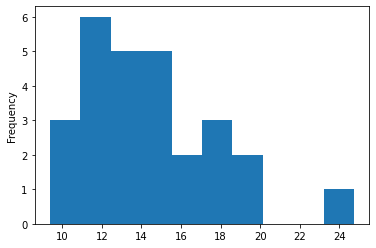

In [37]:
#no detections 
no_det_after_hrs_shattuck = grouped[(grouped['detection'] == False)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']>16) ]['speed']
no_det_after_hrs_shattuck.plot.hist()

<AxesSubplot:ylabel='Frequency'>

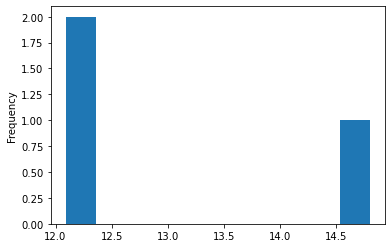

In [40]:
# detections 
det_after_hrs_shattuck = grouped[(grouped['detection'] == True)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']>16) ]['speed']
det_after_hrs_shattuck.plot.hist()

<AxesSubplot:ylabel='Frequency'>

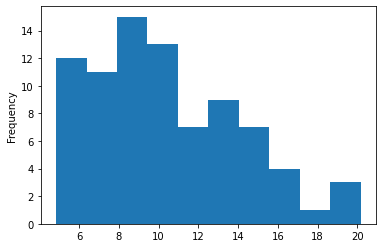

In [41]:
#College AVe no detections after hours
# detections 
no_det_after_hrs_ca = grouped[(grouped['detection'] == False)  & (grouped['segment']=='College Ave') & (grouped['segment_hour']>16) ]['speed']
no_det_after_hrs_ca.plot.hist()

<AxesSubplot:ylabel='Frequency'>

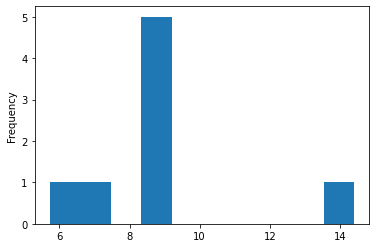

In [42]:
#College AVe detections after hours
# detections 
det_after_hrs_ca = grouped[(grouped['detection'] == True)  & (grouped['segment']=='College Ave') & (grouped['segment_hour']>16) ]['speed']
det_after_hrs_ca.plot.hist()

In [85]:
grouped[(grouped['detection'] == True)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']<8) ]['speed'].mean()

17.531684373433283

In [84]:
grouped[(grouped['detection'] == False)  & (grouped['segment']=='Shattuck') & (grouped['segment_hour']<8) ]['speed'].mean()

21.441176624827378

after 16th hour there is a visible increase in speed when there are no detections compared to when there are detections and early in the morning at 7-8am (on Shattuck segment) during busy hours of the day most slow downs are due to pedestrian traffic and bikes going right in front of the bus. There is some difference in speed, on the bus stop segment throughout the whole day in that the bus has a slower speed when there are truck detections when compared to its speed without any detetcions on that segment